In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')


In [2]:
dataset = pd.read_csv('HistoricalQuotes.csv')
dataset.head()

,Date,Close/Last,Volume,Open,High,Low
0,02/28/2020,$273.36,106721200,$257.26,$278.41,$256.37
1,02/27/2020,$273.52,80151380,$281.1,$286,$272.96
2,02/26/2020,$292.65,49678430,$286.53,$297.88,$286.5
3,02/25/2020,$288.08,57668360,$300.95,$302.53,$286.13
4,02/24/2020,$298.18,55548830,$297.26,$304.18,$289.23


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         2518 non-null   object
 1    Close/Last  2518 non-null   object
 2    Volume      2518 non-null   int64 
 3    Open        2518 non-null   object
 4    High        2518 non-null   object
 5    Low         2518 non-null   object
dtypes: int64(1), object(5)
memory usage: 118.2+ KB


In [4]:
dataset.tail()

,Date,Close/Last,Volume,Open,High,Low
2513,03/05/2010,$31.2786,224647427,$30.7057,$31.3857,$30.6614
2514,03/04/2010,$30.1014,89591907,$29.8971,$30.1314,$29.8043
2515,03/03/2010,$29.9043,92846488,$29.8486,$29.9814,$29.7057
2516,03/02/2010,$29.8357,141486282,$29.99,$30.1186,$29.6771
2517,03/01/2010,$29.8557,137312041,$29.3928,$29.9286,$29.35


In [5]:
dataset["Date"] = pd.to_datetime(dataset['Date'])

In [6]:
dataset.rename(columns={' Close/Last':'Close'},inplace = True)


In [7]:
dataset.columns

Index(['Date', 'Close', ' Volume', ' Open', ' High', ' Low'], dtype='object')

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     2518 non-null   datetime64[ns]
 1   Close    2518 non-null   object        
 2    Volume  2518 non-null   int64         
 3    Open    2518 non-null   object        
 4    High    2518 non-null   object        
 5    Low     2518 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 118.2+ KB


In [16]:
dataset['Close'] = dataset['Close'].str.replace('$', '').astype('float')
dataset[' Open'] = dataset[' Open'].str.replace('$', '').astype('float')
dataset[' High'] = dataset[' High'].str.replace('$', '').astype('float')
dataset[' Low'] = dataset[' Low'].str.replace('$', '').astype('float')

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     2518 non-null   datetime64[ns]
 1   Close    2518 non-null   float64       
 2    Volume  2518 non-null   int64         
 3    Open    2518 non-null   float64       
 4    High    2518 non-null   float64       
 5    Low     2518 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 118.2 KB


In [18]:
dataset.head()

,Date,Close,Volume,Open,High,Low
0,2020-02-28,273.36,106721200,257.26,278.41,256.37
1,2020-02-27,273.52,80151380,281.10,286.00,272.96
2,2020-02-26,292.65,49678430,286.53,297.88,286.50
3,2020-02-25,288.08,57668360,300.95,302.53,286.13
4,2020-02-24,298.18,55548830,297.26,304.18,289.23


In [20]:
dataset.describe()

,Close,Volume,Open,High,Low
count,2518.000000,2.518000e+03,2518.000000,2518.000000,2518.000000
mean,114.769522,7.258009e+07,114.728443,115.766415,113.690582
std,60.662405,5.663113e+07,60.546893,61.134456,60.085105
min,29.835700,1.136205e+07,29.392800,29.928600,28.464300
25%,66.822475,3.053026e+07,66.877150,67.475300,66.372950
50%,101.090000,5.295469e+07,101.115000,102.085000,100.350000
75%,154.630000,9.861006e+07,154.610000,155.735000,153.325000
max,327.200000,4.624423e+08,324.740000,327.850000,323.350000


In [22]:
df = dataset[['Date',' Open']]

In [23]:
df.head()

,Date,Open
0,2020-02-28,257.26
1,2020-02-27,281.10
2,2020-02-26,286.53
3,2020-02-25,300.95
4,2020-02-24,297.26


In [24]:
df.nunique()

Date     2518
 Open    2415
dtype: int64

In [25]:
df.isnull().sum()

Date     0
 Open    0
dtype: int64

In [26]:
import statsmodels.api as sm

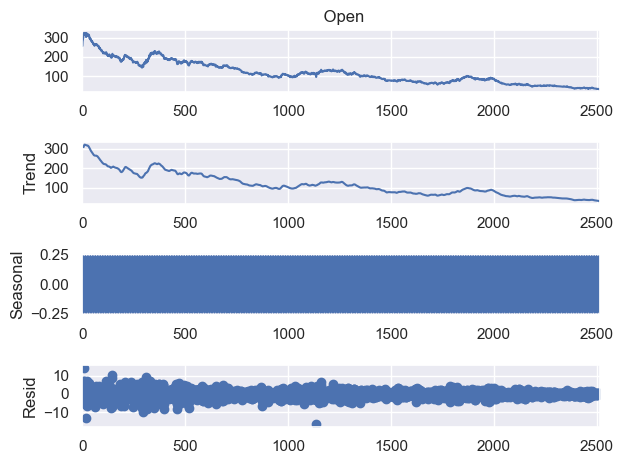

In [28]:
#decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df[' Open'],model='additive',period=12)
decomposition.plot()
plt.show()

# Check autocorrelation

In [29]:
sm.stats.durbin_watson(dataset[' Open'])  #<2 it means positive autocorrelation means timeseries needs to be used

0.0002915525966534706

# Check stationarity

In [33]:
from statsmodels.tsa.stattools import adfuller
adfuller(dataset[' Open'])

(-3.5849282791044073,
 0.006055790760864092,
 24,
 2493,
 {'1%': -3.4329757705711432,
  '5%': -2.862700050059295,
  '10%': -2.567387539813443},
 10476.32508381509)

In [34]:
def adfcheck(timeseries):
    results = adfuller(timeseries)
    print("**********Augmented Dickey fuller Test***********")
    labels = ['ADF Stats test','P value','#Lags','No of obs']
    
    for a,b in zip(results, labels):
        print(b+":"+str(a))
        
    if results[1]<=0.05:
        print("Strong evidence against null hypothesis and my timeseries is stationary")
    else:
        print("Week evidence against null hypothesis and my timeseries is non stationary")

In [35]:
adfcheck(dataset[' Open'])

**********Augmented Dickey fuller Test***********
ADF Stats test:-3.5849282791044073
P value:0.006055790760864092
#Lags:24
No of obs:2493
Strong evidence against null hypothesis and my timeseries is stationary


# Facebook prophet model for time series forecasting

In [36]:
dataset.head(20)

,Date,Close,Volume,Open,High,Low
0,2020-02-28,273.36,106721200,257.26,278.41,256.3700
1,2020-02-27,273.52,80151380,281.10,286.00,272.9600
2,2020-02-26,292.65,49678430,286.53,297.88,286.5000
3,2020-02-25,288.08,57668360,300.95,302.53,286.1300
4,2020-02-24,298.18,55548830,297.26,304.18,289.2300
5,2020-02-21,313.05,32426420,318.62,320.45,310.5000
6,2020-02-20,320.30,25141490,322.63,324.65,318.2100
7,2020-02-19,323.62,23495990,320.00,324.57,320.0000
8,2020-02-18,319.00,38190550,315.36,319.75,314.6100
9,2020-02-14,324.95,20028450,324.74,325.98,322.8500


In [42]:
pip install pystan

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\move\adl_move_swap.hpp -> build\lib.win-amd64-cpython-310\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\move
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\move\algorithm.hpp -> build\lib.win-amd64-cpython-310\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\move
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\move\core.hpp -> build\lib.win-amd64-cpython-310\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\move
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\move\default_delete.hpp -> build\lib.win-amd64-cpython-310\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\move



  Using cached pystan-3.7.0-py3-none-any.whl (13 kB)
     -------------------------------------- 155.4/155.4 kB 1.8 MB/s eta 0:00:00
  Using cached aiohttp-3.8.4-cp310-cp310-win_amd64.whl (319 kB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl (91 kB)
  Using cached pystan-3.6.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.5.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.4.0-py3-none-any.whl (13 kB)
  Using cached pysimdjson-3.2.0.tar.gz (411 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached pystan-3.3.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.2.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.1.1-py3-none-any.whl (13 kB)
  Using cached pystan-3.1.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.0.2-py3-none-any.whl (13 kB)
  Using cached pystan-3.0.1-py3-none-any.whl (12 kB)
  Using cached pystan-3.0.0-py3-none-any.whl (12 kB)
  Using cached pystan-2.19.1.1.tar.gz (16.2 MB)
  Preparing metad

In [40]:
!python -m pip install prophet

     ---------------------------------------- 12.9/12.9 MB 9.2 MB/s eta 0:00:00
     -------------------------------------- 598.5/598.5 kB 6.3 MB/s eta 0:00:00
     ---------------------------------------- 47.9/47.9 kB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 83.2/83.2 kB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 5.8/5.8 MB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 1.4/1.4 MB 8.3 MB/s eta 0:00:00
  Created wheel for pymeeus: filename=PyMeeus-0.5.12-py3-none-any.whl size=732051 sha256=f1022cc39c0b97afbf0abe3dc1b50ad65118b02ed453b9672108278c2ce30c82
  Stored in directory: c:\users\nehaa\appdata\local\pip\cache\wheels\74\47\c4\678b0a3d5213e2f8500f3ea0f8dc3c81478e5b806c557dff58
Successfully built pymeeus


In [41]:
pip install Cython

     -------------------------------------- 988.4/988.4 kB 7.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [44]:
import prophet

In [45]:
dir(prophet)

['Path',
 'Prophet',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'about',
 'diagnostics',
 'f',
 'forecaster',
 'here',
 'make_holidays',
 'models',
 'plot']

In [46]:
df.head()

,Date,Open
0,2020-02-28,257.26
1,2020-02-27,281.10
2,2020-02-26,286.53
3,2020-02-25,300.95
4,2020-02-24,297.26


In [49]:
df_prophet = df.rename(columns={'Date':'ds',' Open':'y'})

In [50]:
df_prophet.head()

,ds,y
0,2020-02-28,257.26
1,2020-02-27,281.10
2,2020-02-26,286.53
3,2020-02-25,300.95
4,2020-02-24,297.26


In [51]:
from prophet import Prophet

In [52]:
m = Prophet()

In [53]:
model = m.fit(df_prophet)
model

16:02:41 - cmdstanpy - INFO - Chain [1] start processing
16:02:49 - cmdstanpy - INFO - Chain [1] done processing


In [54]:
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None}),
             ('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [55]:
len(df_prophet)

2518

In [57]:
df_prophet.head()

,ds,y
0,2020-02-28,257.26
1,2020-02-27,281.10
2,2020-02-26,286.53
3,2020-02-25,300.95
4,2020-02-24,297.26


In [58]:
future_global = model.make_future_dataframe(periods=100, freq='D')

In [59]:
future_global.tail(20)

,ds
2598,2020-05-19
2599,2020-05-20
2600,2020-05-21
2601,2020-05-22
2602,2020-05-23
2603,2020-05-24
2604,2020-05-25
2605,2020-05-26
2606,2020-05-27
2607,2020-05-28


In [60]:
#prediction
prediction = model.predict(future_global)

In [61]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-03-01,31.523389,12.130348,50.038557,31.523389,31.523389,-0.750342,-0.750342,-0.750342,0.093692,0.093692,0.093692,-0.844033,-0.844033,-0.844033,0.0,0.0,0.0,30.773047
1,2010-03-02,31.567251,13.148870,48.747467,31.567251,31.567251,-0.539262,-0.539262,-0.539262,0.617788,0.617788,0.617788,-1.157050,-1.157050,-1.157050,0.0,0.0,0.0,31.027989
2,2010-03-03,31.611114,13.614678,49.356424,31.611114,31.611114,-1.012376,-1.012376,-1.012376,0.441720,0.441720,0.441720,-1.454095,-1.454095,-1.454095,0.0,0.0,0.0,30.598738
3,2010-03-04,31.654977,11.594143,48.031195,31.654977,31.654977,-1.055305,-1.055305,-1.055305,0.674550,0.674550,0.674550,-1.729856,-1.729856,-1.729856,0.0,0.0,0.0,30.599671
4,2010-03-05,31.698840,11.498452,47.645748,31.698840,31.698840,-1.510005,-1.510005,-1.510005,0.469536,0.469536,0.469536,-1.979541,-1.979541,-1.979541,0.0,0.0,0.0,30.188835


In [62]:
prediction[['ds', 'yhat','yhat_lower','yhat_upper']].tail(40)

,ds,yhat,yhat_lower,yhat_upper
2578,2020-04-29,260.477353,242.901458,279.410763
2579,2020-04-30,260.864831,243.508631,280.446769
2580,2020-05-01,260.795846,242.095971,280.489126
2581,2020-05-02,259.293580,241.437008,279.243580
2582,2020-05-03,259.388475,240.898628,278.238222
2583,2020-05-04,260.704406,242.100388,277.774339
2584,2020-05-05,261.281160,244.170228,282.052830
2585,2020-05-06,261.137793,242.049267,279.810471
2586,2020-05-07,261.384951,242.977817,278.842192
2587,2020-05-08,261.178024,241.044125,279.234519


# Visualization

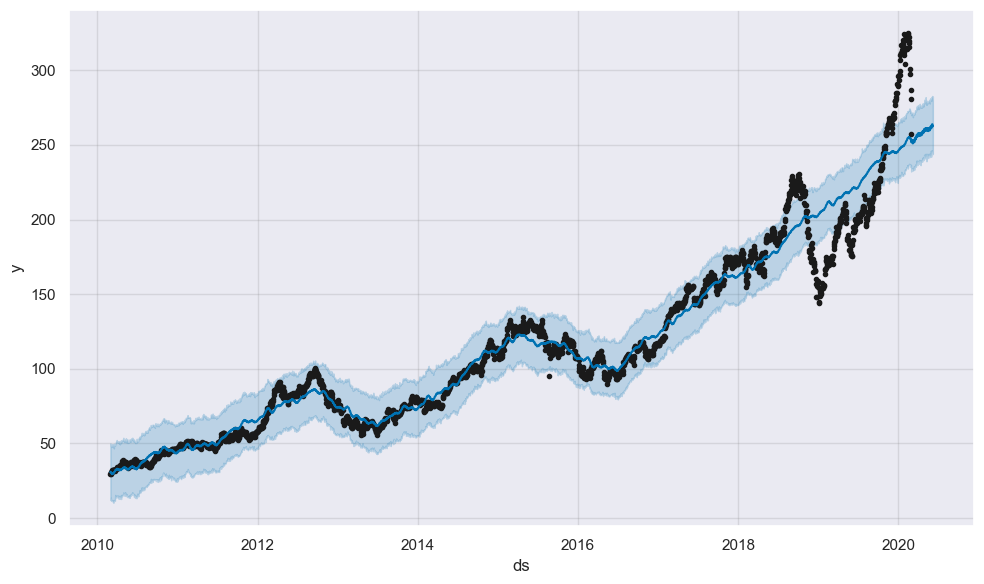

In [64]:
model.plot(prediction)
plt.show()

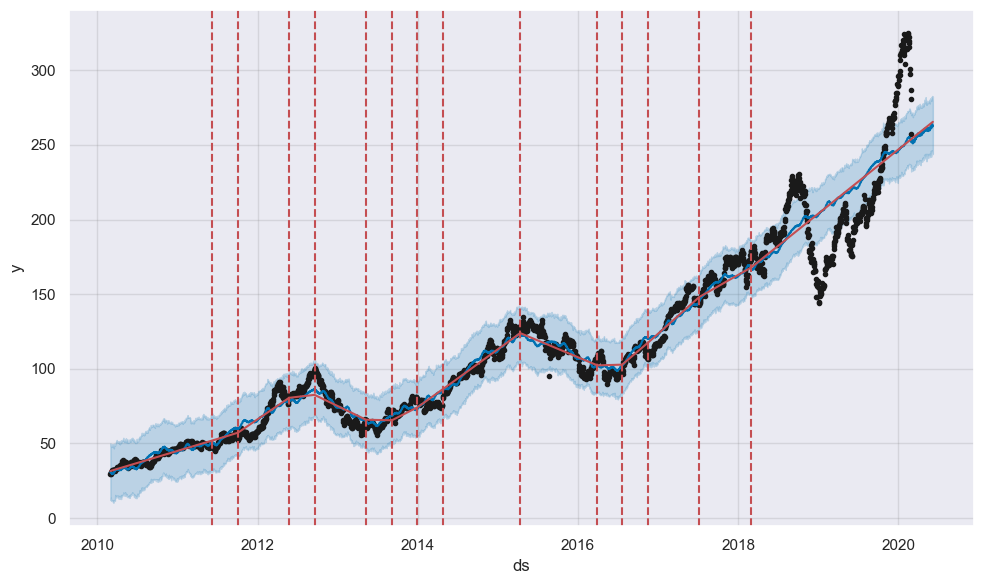

In [65]:
from prophet.plot import add_changepoints_to_plot
fig = model.plot(prediction)
a = add_changepoints_to_plot(fig.gca(),model,prediction)
plt.show()

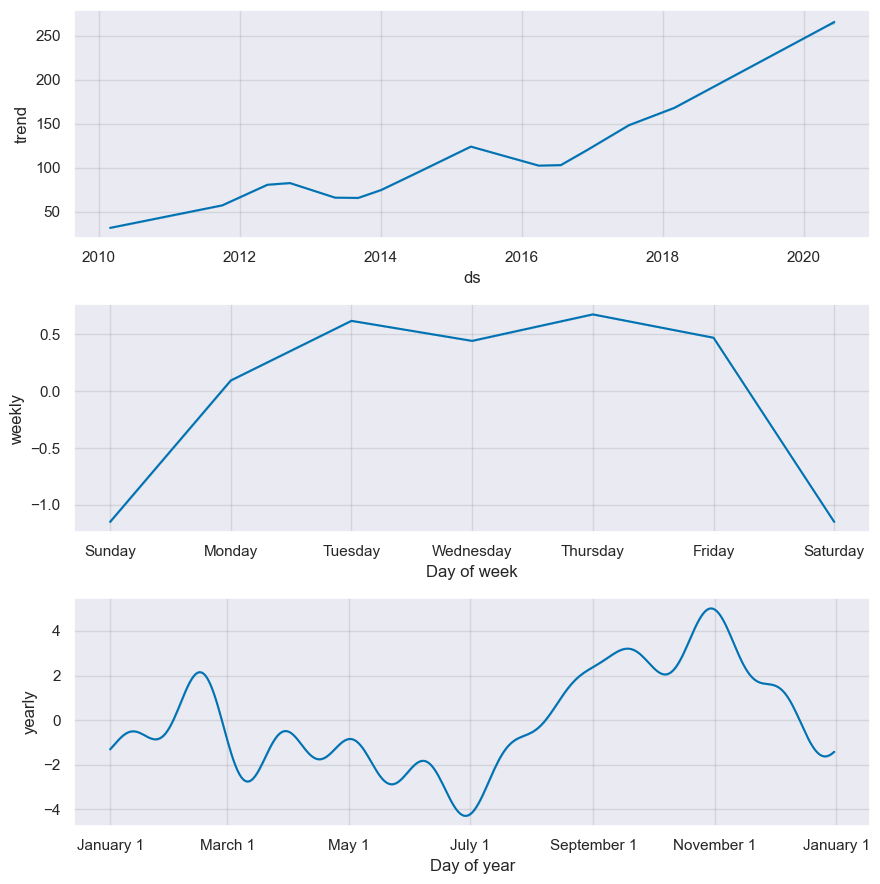

In [66]:
model.plot_components(prediction)
plt.show()

# Performance evaluation

In [67]:
from prophet.diagnostics import cross_validation

In [68]:
df_cv = cross_validation(model, horizon='30 days',period='15 days',initial = '90 days')

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/236 [00:00<?, ?it/s]

16:16:04 - cmdstanpy - INFO - Chain [1] start processing
16:16:04 - cmdstanpy - INFO - Chain [1] done processing
16:16:04 - cmdstanpy - INFO - Chain [1] start processing
16:16:04 - cmdstanpy - INFO - Chain [1] done processing
16:16:05 - cmdstanpy - INFO - Chain [1] start processing
16:16:05 - cmdstanpy - INFO - Chain [1] done processing
16:16:05 - cmdstanpy - INFO - Chain [1] start processing
16:16:05 - cmdstanpy - INFO - Chain [1] done processing
16:16:06 - cmdstanpy - INFO - Chain [1] start processing
16:16:06 - cmdstanpy - INFO - Chain [1] done processing
16:16:06 - cmdstanpy - INFO - Chain [1] start processing
16:16:06 - cmdstanpy - INFO - Chain [1] done processing
16:16:06 - cmdstanpy - INFO - Chain [1] start processing
16:16:07 - cmdstanpy - INFO - Chain [1] done processing
16:16:07 - cmdstanpy - INFO - Chain [1] start processing
16:16:07 - cmdstanpy - INFO - Chain [1] done processing
16:16:07 - cmdstanpy - INFO - Chain [1] start processing
16:16:07 - cmdstanpy - INFO - Chain [1]

16:16:37 - cmdstanpy - INFO - Chain [1] done processing
16:16:38 - cmdstanpy - INFO - Chain [1] start processing
16:16:38 - cmdstanpy - INFO - Chain [1] done processing
16:16:39 - cmdstanpy - INFO - Chain [1] start processing
16:16:39 - cmdstanpy - INFO - Chain [1] done processing
16:16:39 - cmdstanpy - INFO - Chain [1] start processing
16:16:40 - cmdstanpy - INFO - Chain [1] done processing
16:16:40 - cmdstanpy - INFO - Chain [1] start processing
16:16:40 - cmdstanpy - INFO - Chain [1] done processing
16:16:41 - cmdstanpy - INFO - Chain [1] start processing
16:16:41 - cmdstanpy - INFO - Chain [1] done processing
16:16:41 - cmdstanpy - INFO - Chain [1] start processing
16:16:42 - cmdstanpy - INFO - Chain [1] done processing
16:16:42 - cmdstanpy - INFO - Chain [1] start processing
16:16:42 - cmdstanpy - INFO - Chain [1] done processing
16:16:42 - cmdstanpy - INFO - Chain [1] start processing
16:16:43 - cmdstanpy - INFO - Chain [1] done processing
16:16:43 - cmdstanpy - INFO - Chain [1] 

16:17:31 - cmdstanpy - INFO - Chain [1] done processing
16:17:32 - cmdstanpy - INFO - Chain [1] start processing
16:17:32 - cmdstanpy - INFO - Chain [1] done processing
16:17:33 - cmdstanpy - INFO - Chain [1] start processing
16:17:33 - cmdstanpy - INFO - Chain [1] done processing
16:17:34 - cmdstanpy - INFO - Chain [1] start processing
16:17:34 - cmdstanpy - INFO - Chain [1] done processing
16:17:35 - cmdstanpy - INFO - Chain [1] start processing
16:17:35 - cmdstanpy - INFO - Chain [1] done processing
16:17:36 - cmdstanpy - INFO - Chain [1] start processing
16:17:37 - cmdstanpy - INFO - Chain [1] done processing
16:17:37 - cmdstanpy - INFO - Chain [1] start processing
16:17:37 - cmdstanpy - INFO - Chain [1] done processing
16:17:38 - cmdstanpy - INFO - Chain [1] start processing
16:17:38 - cmdstanpy - INFO - Chain [1] done processing
16:17:39 - cmdstanpy - INFO - Chain [1] start processing
16:17:39 - cmdstanpy - INFO - Chain [1] done processing
16:17:40 - cmdstanpy - INFO - Chain [1] 

16:18:47 - cmdstanpy - INFO - Chain [1] done processing
16:18:47 - cmdstanpy - INFO - Chain [1] start processing
16:18:48 - cmdstanpy - INFO - Chain [1] done processing
16:18:48 - cmdstanpy - INFO - Chain [1] start processing
16:18:49 - cmdstanpy - INFO - Chain [1] done processing
16:18:50 - cmdstanpy - INFO - Chain [1] start processing
16:18:50 - cmdstanpy - INFO - Chain [1] done processing
16:18:51 - cmdstanpy - INFO - Chain [1] start processing
16:18:51 - cmdstanpy - INFO - Chain [1] done processing
16:18:52 - cmdstanpy - INFO - Chain [1] start processing
16:18:53 - cmdstanpy - INFO - Chain [1] done processing
16:18:53 - cmdstanpy - INFO - Chain [1] start processing
16:18:54 - cmdstanpy - INFO - Chain [1] done processing
16:18:54 - cmdstanpy - INFO - Chain [1] start processing
16:18:55 - cmdstanpy - INFO - Chain [1] done processing
16:18:56 - cmdstanpy - INFO - Chain [1] start processing
16:18:57 - cmdstanpy - INFO - Chain [1] done processing
16:18:57 - cmdstanpy - INFO - Chain [1] 

In [69]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2010-06-07,30.500733,29.703465,31.256433,36.8986,2010-06-05
1,2010-06-08,25.938237,25.114020,26.744362,36.1771,2010-06-05
2,2010-06-09,19.873168,19.111959,20.630578,35.9243,2010-06-05
3,2010-06-10,11.600310,10.833558,12.441276,34.9771,2010-06-05
4,2010-06-11,0.961680,0.159721,1.755074,35.4607,2010-06-05
...,...,...,...,...,...,...
4875,2020-02-24,239.296099,222.875339,255.653561,297.2600,2020-01-29
4876,2020-02-25,240.057680,222.780564,256.440500,300.9500,2020-01-29
4877,2020-02-26,240.147622,223.055812,256.427081,286.5300,2020-01-29
4878,2020-02-27,240.505491,224.346259,257.460858,281.1000,2020-01-29


In [70]:
from prophet.diagnostics import performance_metrics

In [71]:
df_performance = performance_metrics(df_cv)

In [72]:
df_performance

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,247.797002,15.741569,9.000897,0.068879,0.044961,0.069176,0.378933
1,4 days,236.824667,15.389109,8.880735,0.070293,0.044777,0.070506,0.398529
2,5 days,242.370535,15.568254,9.228042,0.075383,0.047503,0.075649,0.398319
3,6 days,239.298489,15.469276,9.359011,0.078556,0.054667,0.080644,0.374150
4,7 days,260.030518,16.125462,9.667672,0.079783,0.055124,0.082042,0.348563
5,8 days,299.340095,17.301448,10.316547,0.086081,0.058347,0.086510,0.311755
6,9 days,356.497569,18.881143,11.151859,0.098569,0.061279,0.094211,0.291633
7,10 days,398.081301,19.951975,11.755505,0.114208,0.065499,0.104345,0.268669
8,11 days,448.629505,21.180876,12.106758,0.125836,0.065552,0.109144,0.265307
9,12 days,501.773745,22.400307,12.141547,0.131441,0.063698,0.107723,0.276639


In [73]:
from prophet.plot import plot_cross_validation_metric

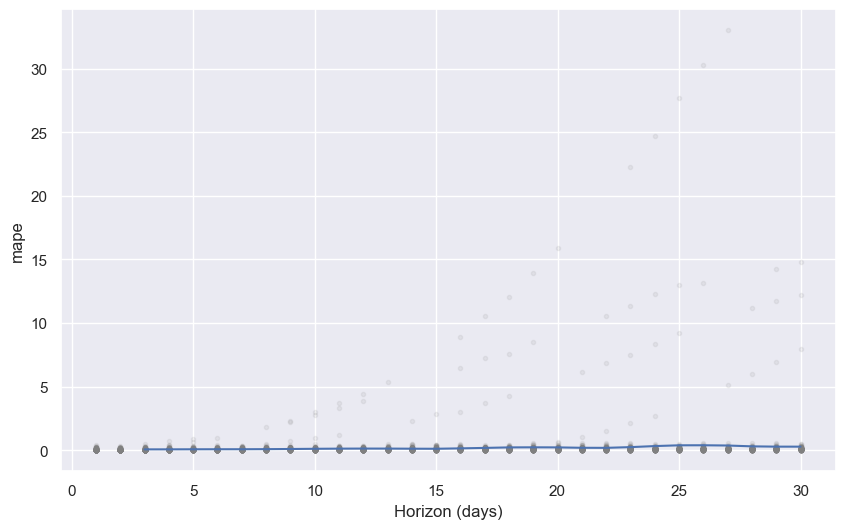

In [74]:
df_performance = plot_cross_validation_metric(df_cv, metric ='mape')

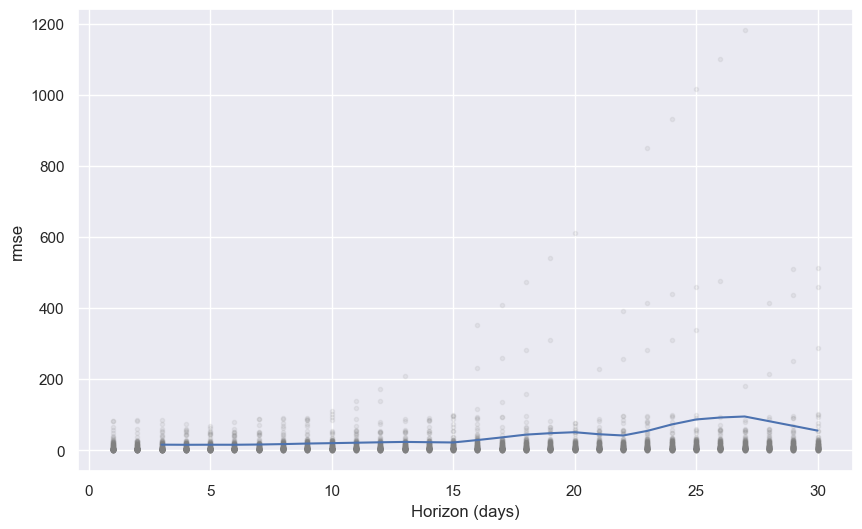

In [75]:
df_performance = plot_cross_validation_metric(df_cv, metric='rmse')